<a href="https://colab.research.google.com/github/Jira-saki/Data_Analysis_using_python/blob/main/Data_Cleansing_with_Spark_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleansing with Spark

## Dataset
https://archive.ics.uci.edu/ml/datasets/Online+Retail
### Data Dictionary

This is a transactional data set which contains all the transactions occurring between 01/12/2018 and 09/12/2019 for a UK-based and registered non-store online retail.

The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


## Pyspark installation 

In [9]:
# Install Spark for Google Colab
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark==1.3.0

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [10]:
# Setting Spark enviroment variable 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [11]:
# Installing pyspark 
!pip install pyspark==3.1.2

#### Working with Spark

In [12]:
# Check Google Colab Core Server.
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.188
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.37
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [13]:
# Building Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "legacy") # code for Spark3 to process like Spark2 (Preventing an Error when using function)

In [14]:
# Get Python version
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)

In [15]:
# Get Spark version
spark.version

'3.1.2'

#### Mounting to Google Drive


In [16]:
# Mount Google colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

`spark.read.csv` to read CSV file.

Arguments to Spark
Header = True (First sentence of CSV is Header)
Inferschema = True << (Spark will assume schema type of each column. If "False", columns will be assumed as string.

In [17]:
dt = spark.read.csv('/content/OnlineRetail.csv', header = True, inferSchema = True, )

### Data Profiling

Data Profiling is a process of analysing summary of the data.

Example: max, min, average, sum, how many missing values etc.

#### Data

> Columns
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

In [18]:
dt

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: int, Country: string]

In [19]:
dt.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [20]:
dt.show(100)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [21]:
# Show Schema
dt.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'double'),
 ('CustomerID', 'int'),
 ('Country', 'string')]

In [22]:
# Show Schema with nullable
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [23]:
# Count columns
print((dt.count(), len(dt.columns)))

(541909, 8)


In [24]:
# Statistic Summary
dt.describe().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280800133| 16799.73762842775|                null|218.08115785023486|           null| 96.7598530611797| 1713.600303321594|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [25]:
# Statistic Summary
dt.summary().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280800133| 16799.73762842775|                null|218.08115785023486|           null| 96.7598530611797| 1713.600303321594|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [26]:
#Statistic Summary for specific column ท
dt.select("Quantity", "UnitPrice").describe().show()

+-------+------------------+-----------------+
|summary|          Quantity|        UnitPrice|
+-------+------------------+-----------------+
|  count|            541909|           541909|
|   mean|  9.55224954743324|4.611113626082972|
| stddev|218.08115785023486| 96.7598530611797|
|    min|            -80995|        -11062.06|
|    max|             80995|          38970.0|
+-------+------------------+-----------------+



### Median of Quantity

In [27]:
#dt.select("Quantity").summary().show()
dt.select("Quantity").summary().collect()[5]

Row(summary='50%', Quantity='3')

## EDA - Exploratory Data Analysis

### Non-Graphical EDA

In [28]:
# Select text-based information
dt.where(dt['Quantity'] < 0).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|  C536379|        D|            Discount|      -1| 12/1/2010 9:41|     27.5|     14527|United Kingdom|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1| 12/1/2010 9:49|     4.65|     15311|United Kingdom|
|  C536391|    22556|PLASTERS IN TIN C...|     -12|12/1/2010 10:24|     1.65|     17548|United Kingdom|
|  C536391|    21984|PACK OF 12 PINK P...|     -24|12/1/2010 10:24|     0.29|     17548|United Kingdom|
|  C536391|    21983|PACK OF 12 BLUE P...|     -24|12/1/2010 10:24|     0.29|     17548|United Kingdom|
|  C536391|    21980|PACK OF 12 RED RE...|     -24|12/1/2010 10:24|     0.29|     17548|United Kingdom|
|  C536391|    21484|CHICK GREY HOT WA...|     -12|12/1/2010 10:

### Assumption 
1. Find Quantity of 50 - 120
2. Find UnitPrice of 0.1 - 0.5
3. Quantity 50 - 120 ,UnitPrice  0.1 - 0.5

In [29]:
#  Quantity 50 - 120
dt.where( (dt['Quantity'] > 50) & (dt['Quantity'] < 120) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536371|    22086|PAPER CHAIN KIT 5...|      80| 12/1/2010 9:00|     2.55|     13748|United Kingdom|
|   536376|    21733|RED HANGING HEART...|      64| 12/1/2010 9:32|     2.55|     15291|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96| 12/1/2010 9:37|     0.38|     14688|United Kingdom|
|   536386|   85099C|JUMBO  BAG BAROQU...|     100| 12/1/2010 9:57|     1.65|     16029|United Kingdom|
|   536386|   85099B|JUMBO BAG RED RET...|     100| 12/1/2010 9:57|     1.65|     16029|United Kingdom|
|   536390|   85123A|WHITE HANGING HEA...|      64|12/1/2010 10:19|     2.55|     17511|United Kingdom|
|   536390|    22197|SMALL POPCORN HOLDER|     100|12/1/2010 10:

In [30]:
#UnitPrice 0.1 - 0.5
dt.where( (dt['Unitprice'] >= 0.1) & (dt['Unitprice'] <= 0.5) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536370|    22540|MINI JIGSAW CIRCU...|      24| 12/1/2010 8:45|     0.42|     12583|        France|
|   536370|    22544|MINI JIGSAW SPACEBOY|      24| 12/1/2010 8:45|     0.42|     12583|        France|
|   536378|    21212|PACK OF 72 RETROS...|     120| 12/1/2010 9:37|     0.42|     14688|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96| 12/1/2010 9:37|     0.38|     14688|United Kingdom|
|   536388|    22915|ASSORTED BOTTLE T...|      12| 12/1/2010 9:59|     0.42|     16250|United Kingdom|
|   536390|    20668|DISCO BALL CHRIST...|     288|12/1/2010 10:19|      0.1|     17511|United Kingdom|
|   536390|    21786|  POLKADOT RAIN HAT |     144|12/1/2010 10:

In [31]:
# Quantity 50 - 120 and UnitPrice 0.1 - 0.5
dt.where( dt["Quantity"]. between(50,120) & dt ["Unitprice"]. between(0.1,0.5) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536378|    21212|PACK OF 72 RETROS...|     120| 12/1/2010 9:37|     0.42|     14688|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96| 12/1/2010 9:37|     0.38|     14688|United Kingdom|
|   536532|    84692|BOX OF 24 COCKTAI...|      50|12/1/2010 13:24|     0.42|     12433|        Norway|
|   536563|   85199S|SMALL HANGING IVO...|      72|12/1/2010 15:08|     0.42|     17760|United Kingdom|
|   536617|    85175|CACTI T-LIGHT CAN...|      96|12/2/2010 10:17|     0.42|     13941|United Kingdom|
|   536620|    21215|IVORY PAPER CUP C...|     120|12/2/2010 10:27|     0.42|     14135|United Kingdom|
|   536620|    21212|PACK OF 72 RETROS...|     120|12/2/2010 10:

### Graphical EDA


Importing packages seaborn, matplotlib, pandas for graph visualisation.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Convert Spark Dataframe to Pandas Dataframe
dt_pd = dt.toPandas()

In [34]:
dt_pd.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
# Select 500 rows for data visualise.
dt_pd_subset = dt_pd[0:500]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


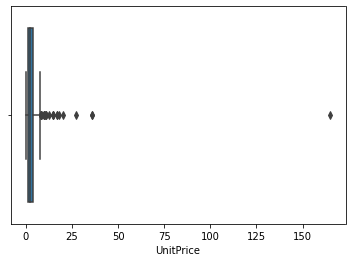

In [36]:
# Boxplot
sns.boxplot(dt_pd_subset['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


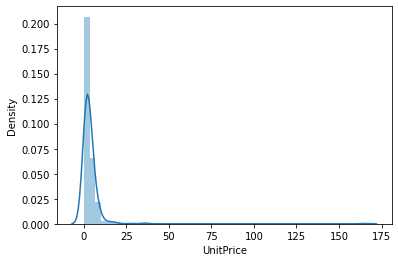

In [37]:
# Histogram *distplot= distribution plot
sns.distplot(dt_pd_subset['UnitPrice']) 
plt.show()

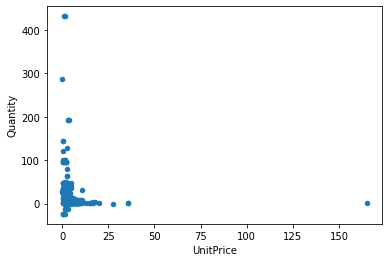

In [38]:
# Scatterplot to see the contrast.
dt_pd_subset.plot.scatter('UnitPrice', 'Quantity')

#### Interactive chart

In [39]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd_subset, 'UnitPrice', 'Quantity')
fig.show()

### Type Conversion

Convert `InvoiceDate` from string -> date

In [40]:
# Show top 5 rows
dt.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



In [41]:
# Show Schema
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



Is the date DD/MM/YYYY or MM/DD/YYYY? Let's find out



In [42]:
# Show unique Invoice Date
dt.select("InvoiceDate").distinct().show()

+----------------+
|     InvoiceDate|
+----------------+
| 12/1/2010 11:45|
| 12/1/2010 12:36|
| 12/2/2010 15:26|
| 12/6/2010 11:01|
| 12/8/2010 13:14|
| 12/9/2010 14:29|
| 12/9/2010 15:21|
| 12/15/2010 9:20|
|12/19/2010 15:31|
|  1/5/2011 15:30|
|  1/9/2011 14:12|
| 1/14/2011 12:05|
| 1/16/2011 12:11|
| 1/16/2011 13:54|
| 1/23/2011 11:48|
| 1/24/2011 14:01|
| 1/28/2011 11:27|
| 1/31/2011 12:14|
| 1/31/2011 12:21|
|   2/1/2011 8:31|
+----------------+
only showing top 20 rows



In [43]:
# Convert string to date  with new column using  df.withColumn()
from pyspark.sql import functions as f

# dt_temp = dt.withColumn('InvoiceDateTime', functions.to_date(
#     functions.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
# ))

dt_temp = dt.withColumn('InvoiceDateTime', 
    f.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
)
dt_temp.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|    2

In [44]:
dt_temp.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



In [45]:
dt_final = dt_temp.drop('InvoiceDate')
dt_final.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|     17850|United Kingdom|2010-01-12 08:26:00|
|   536365|    21730|GLASS S

In [46]:
dt_final.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



## Data Cleansing with Spark

### Anomalies Check

#### Syntactical Anomalies
**Lexical errors** (wrong typing)

In [47]:
# Check country distinct values.
dt_final.select("Country").distinct().show()

+------------------+
|           Country|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|         Hong Kong|
|           Iceland|
|            Israel|
+------------------+
only showing top 20 rows



In [48]:
dt_final.where(dt_final['Country'] == 'EIREs').show()

+---------+---------+-----------+--------+---------+----------+-------+---------------+
|InvoiceNo|StockCode|Description|Quantity|UnitPrice|CustomerID|Country|InvoiceDateTime|
+---------+---------+-----------+--------+---------+----------+-------+---------------+
+---------+---------+-----------+--------+---------+----------+-------+---------------+



In [49]:
# Modify an error name
from pyspark.sql.functions import when

dt_temp_eire = dt_final.withColumn("CountryUpdate", when(dt_final['Country'] == 'EIREs', 'EIRE').otherwise(dt_final['Country']))

In [50]:
# Check the result
dt_temp_eire.select("CountryUpdate").distinct().show()

+------------------+
|     CountryUpdate|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|         Hong Kong|
|           Iceland|
|            Israel|
+------------------+
only showing top 20 rows



In [51]:
# Create final Dataframe
dt_final_eire = dt_temp_eire.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [52]:
dt_final_eire.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|    21730|GLASS S

#### Semantic Anomalies

**Integrity constraints**

In [53]:
dt_final_eire.select("Stockcode").show(100)

+---------+
|Stockcode|
+---------+
|   85123A|
|    71053|
|   84406B|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    22633|
|    22632|
|    84879|
|    22745|
|    22748|
|    22749|
|    22310|
|    84969|
|    22623|
|    22622|
|    21754|
|    21755|
|    21777|
|    48187|
|    22960|
|    22913|
|    22912|
|    22914|
|    21756|
|    22728|
|    22727|
|    22726|
|    21724|
|    21883|
|    10002|
|    21791|
|    21035|
|    22326|
|    22629|
|    22659|
|    22631|
|    22661|
|    21731|
|    22900|
|    21913|
|    22540|
|    22544|
|    22492|
|     POST|
|    22086|
|    22632|
|    22633|
|   85123A|
|    71053|
|   84406B|
|    20679|
|    37370|
|    21871|
|    21071|
|    21068|
|    82483|
|    82486|
|    82482|
|   82494L|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    21258|
|   85123A|
|    71053|
|   84406B|
|    20679|
|    37370|
|    21871|
|    21071|
|    21068|
|    82483|
|    82486|
|    82482|
|   82494L|
|   84029G|
|   84029E|
|   

In [54]:
dt_final_eire.count()

541909

In [55]:
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).count()

487036

In [56]:
# Check data
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).show(5)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-01-12 08:26:00|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|     4.25|     17850|2010-01-12 08:26:00|United Kingdom|
|   536366|    22633|HAND WARMER UNION...|       6|     1.85|     17850|2010-01-12 08:28:00|United Kingdom|
|   536366|    22632|HAND WARMER RED P...|       6|     1.85|     17850|2010-01-12 08:28:00|United Kingdom|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
only showing top 5 rows



In [57]:
# check incorrect data
dt_correct_stockcode = dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$"))
dt_incorrect_stockcode = dt_final_eire.subtract(dt_correct_stockcode)

dt_incorrect_stockcode.show(10)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   558904|   15044C|PURPLE PAPER PARASOL|       1|     5.79|      null|2011-04-07 16:18:00|United Kingdom|
|   541280|   17012B|ORIGAMI JASMINE I...|      12|     2.55|     15296|               null|United Kingdom|
|   543915|   85170C|SET/6 EAU DE NIL ...|      12|     0.85|     13717|               null|United Kingdom|
|   558355|   84927F|PSYCHEDELIC TILE ...|       2|      2.1|     13614|               null|United Kingdom|
|   558441|   84596F|SMALL MARSHMALLOW...|       2|     0.42|     14606|               null|United Kingdom|
|   546896|   84535B|FAIRY CAKES NOTEB...|       1|     1.46|      null|               null|United Kingdom|
|   541969|   85132C|CHARLIE

> Finding incorrect Pattern of Stock Code

In [58]:
# remove the last string from stock code #  ,r'[A-Z]', '')  find A-Z replace with " " (blank)
from pyspark.sql.functions import regexp_replace

dt_temp_stockcode = dt_final_eire.withColumn("StockcodeUpdate", regexp_replace(dt_final_eire['Stockcode'], r'[A-Z]', ''))

In [59]:
# Check the result
dt_temp_stockcode.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockcodeUpdate|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|          85123|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|          71053|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|          84406|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|          84029|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|          84029|
|   5363

In [60]:
# Create final Dataframe
dt_final_stockcode = dt_temp_stockcode.drop("Stockcode").withColumnRenamed('StockcodeUpdate', 'StockCode')

In [61]:
dt_final_stockcode.show(4)

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
only showing top 4 rows



#### Missing values

Check Missing Values

In [62]:
# Check missing values in each column
# (*[sum(col(c).isNull().cast("int")).alias(c)  find sum() of column"c" Count null value with True,False  and change to "int" 
from pyspark.sql.functions import col,sum

dt_final_stockcode.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in dt_final_stockcode.columns]).show()

+---------+-----------+--------+---------+----------+---------------+-------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|InvoiceDateTime|Country|StockCode|
+---------+-----------+--------+---------+----------+---------------+-------+---------+
|        0|       1454|       0|        0|    135080|         308950|      0|        0|
+---------+-----------+--------+---------+----------+---------------+-------+---------+



In [63]:
# Check which row of 'Description' = null.

dt_final_stockcode.where( dt_final_stockcode['Description'].isNull() ).show()

+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|   536414|       null|      56|      0.0|      null|2010-01-12 11:52:00|United Kingdom|    22139|
|   536545|       null|       1|      0.0|      null|2010-01-12 14:32:00|United Kingdom|    21134|
|   536546|       null|       1|      0.0|      null|2010-01-12 14:33:00|United Kingdom|    22145|
|   536547|       null|       1|      0.0|      null|2010-01-12 14:33:00|United Kingdom|    37509|
|   536549|       null|       1|      0.0|      null|2010-01-12 14:34:00|United Kingdom|    85226|
|   536550|       null|       1|      0.0|      null|2010-01-12 14:34:00|United Kingdom|    85044|
|   536552|       null|       1|      0.0|      null|2010-01-12 14:34:00|United Kingdom|    20950|
|   536553

In [64]:
# Check which row of "customerID" = null.

dt_final_stockcode.where( dt_final_stockcode['customerID'].isNull() ).show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536414|                null|      56|      0.0|      null|2010-01-12 11:52:00|United Kingdom|    22139|
|   536544|DECORATIVE ROSE B...|       1|     2.51|      null|2010-01-12 14:32:00|United Kingdom|    21773|
|   536544|DECORATIVE CATS B...|       2|     2.51|      null|2010-01-12 14:32:00|United Kingdom|    21774|
|   536544|  POLKADOT RAIN HAT |       4|     0.85|      null|2010-01-12 14:32:00|United Kingdom|    21786|
|   536544|RAIN PONCHO RETRO...|       2|     1.66|      null|2010-01-12 14:32:00|United Kingdom|    21787|
|   536544|  VINTAGE SNAP CARDS|       9|     1.66|      null|2010-01-12 14:32:00|United Kingdom|    21790|
|   536544|VINTAGE HEADS AND

### Use Case:
Data Analyst would like to replace "Customer ID"'s NULL to -1

In [65]:
# Write code here
dt_customer_notnull = dt_final_stockcode.withColumn("CustomerIDUpdate", when(dt_final_stockcode['customerID'].isNull(),  -1).otherwise(dt_final_stockcode['customerID']))
dt_customer_notnull.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|CustomerIDUpdate|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|    85123|           17850|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    71053|           17850|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|    84406|           17850|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|           17850|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|           17850|


### Clean data with Spark SQL


Value of `unitPrice` , `Quantity` is Corrected (> 0)

In [66]:
dt_final_stockcode.createOrReplaceTempView("sales")
dt_sql = spark.sql("SELECT * FROM sales")
dt_sql.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-01-12 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

In [67]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row FROM sales")
dt_sql_count.show()

+-------+
|cnt_row|
+-------+
| 541909|
+-------+



In [68]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC")
dt_sql_count.show()

+-------+---------------+
|cnt_row|        country|
+-------+---------------+
| 495478| United Kingdom|
|   9495|        Germany|
|   8557|         France|
|   8196|           EIRE|
|   2533|          Spain|
|   2371|    Netherlands|
|   2069|        Belgium|
|   2002|    Switzerland|
|   1519|       Portugal|
|   1259|      Australia|
|   1086|         Norway|
|    803|          Italy|
|    758|Channel Islands|
|    695|        Finland|
|    622|         Cyprus|
|    462|         Sweden|
|    446|    Unspecified|
|    401|        Austria|
|    389|        Denmark|
|    358|          Japan|
+-------+---------------+
only showing top 20 rows



In [69]:
dt_sql_valid_price = spark.sql("SELECT count(*) as cnt_row FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+-------+
|cnt_row|
+-------+
| 530104|
+-------+



In [70]:
dt_sql_valid_price = spark.sql("SELECT * FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-01-12 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-01-12 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-01-12 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-01-12 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

### TODO: 
1.  Country USA which InvoiceDateTime from 2010-12-01  and UnitPrice > 3.5 
2.  Country France which InvoiceDateTime from 2010-12-05 and UnitPrice  > 5.5 and Description with "Box"

In [71]:
# TODO: Country USA which InvoiceDateTime from 2010-12-01 and UnitPrice > 3.5
dt_sql_valid_price = spark.sql("""
SELECT * FROM sales 
  WHERE UnitPrice > 3.5 
  AND Country = 'USA' 
  AND InvoiceDateTime >= '2010-12-01'
""")
dt_sql_valid_price.show()

+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|   570467|SET OF 6 SOLDIER ...|       4|     3.75|     12607|2011-10-10 16:06:00|    USA|    22619|
|   570467|BAKING SET 9 PIEC...|       3|     4.95|     12607|2011-10-10 16:06:00|    USA|    22138|
|   570467|DOORMAT SPOTTY HO...|       2|     8.25|     12607|2011-10-10 16:06:00|    USA|    21524|
|   570467|BLUE HAPPY BIRTHD...|       3|     5.45|     12607|2011-10-10 16:06:00|    USA|    47590|
|   570467|PINK HAPPY BIRTHD...|       3|     5.45|     12607|2011-10-10 16:06:00|    USA|    47590|
|   570467|SET OF 4 ENGLISH ...|       4|     3.75|     12607|2011-10-10 16:06:00|    USA|    84509|
|   570467|STRAWBERRY FAIRY ...|       8|     4.95|     12607|2011-10-10 16:06:00|    USA| 

In [80]:
# Country France which InvoiceDateTime from 2010-12-05 and UnitPrice > 5.5 and Description with "Box"
dt_sql_valid_price = spark.sql("""
SELECT *  
  FROM sales 
  WHERE UnitPrice >= 5.5 
  AND InvoiceDateTime >= '2010-12-05' 
  And Country = 'France'
  AND LOWER(Description) LIKE '%box%'
""").show()

+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|   540178|BOOM BOX SPEAKER ...|       2|     5.95|     12681|2011-05-01 12:42:00| France|    21064|
|   540351|  TOOL BOX SOFT TOY |       1|     8.95|     12735|2011-06-01 14:26:00| France|    21055|
|   540365|  TOOL BOX SOFT TOY |       3|     8.95|     12413|2011-06-01 16:12:00| France|    21055|
|   552826|MARIE ANTOINETTE ...|       2|     12.5|     14277|2011-11-05 13:20:00| France|    23072|
|   552826|MARIE ANTOINETTE ...|       2|     12.5|     14277|2011-11-05 13:20:00| France|    23071|
|   552826|PARISIENNE SEWING...|       2|     12.5|     14277|2011-11-05 13:20:00| France|    23111|
|   562450|SET 7 BABUSHKA NE...|       6|      8.5|     12562|2011-05-08 08:40:00| France| 

## Save cleaned data to CSV

In [83]:
dt_customer_notnull.write.csv('Cleaned_data.csv', header = True)